# Revenue of a bike retail store: multiple linear regression

                Project for the course: "Mathematics for machine learning" by Opencampus.sh
                                Project by: Miriam Mesghennà

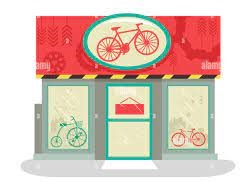

This project aims at predicting the sales of a bike company. In order to do that, I will check if there is a correlation between the money spent by a customer purchase ("Revenue" column) and the following variables: customer age, customer gender and product price. 

Dataset source:

https://www.kaggle.com/datasets/thedevastator/analyzing-customer-spending-habits-to-improve-sa?resource=download


## Contents

### 1) Analysis of the dataset and data cleaning
     
     1.1. Dropping irrelevant columns
     1.2. Information about the columns
     1.3. Data Cleaning
     
### 2) Linear regression analysis

    2.1. Checking for multicollinearity
    2.2. Linear regression model and results

### 3) Conclusion

<br>
<br>
<br>

#### 1.1. Dropping irrelevant columns

In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_rows", 7)
df = pd.read_csv("Bike_store_data.csv")
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,08/30/15,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN
34866,34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095,NaN


Let's drop the columns "index", "Date", "Year", "Month", "State", "Product Category", "Sub Category","Quantity", "Unit Cost", "Column1":

In [3]:
df = df.drop(columns=["index", "Date", "Year", "Month", "State", "Product Category","Sub Category","Quantity", "Unit Cost", "Cost", "Column1"])

In [4]:
df

,Customer Age,Customer Gender,Country,Unit Price,Revenue
0,29.0,F,United States,109.000000,109.000000
1,29.0,F,United States,28.500000,57.000000
2,29.0,F,United States,5.000000,15.000000
...,...,...,...,...,...
34864,38.0,M,France,560.666667,1682.000000
34865,38.0,M,France,1568.000000,1568.000000
34866,NaN,NaN,NaN,NaN,641.532095


### 1.2. Information about the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Age     34866 non-null  float64
 1   Customer Gender  34866 non-null  object 
 2   Country          34866 non-null  object 
 3   Unit Price       34866 non-null  float64
 4   Revenue          34867 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


### 1.3. Data cleaning

#### Customer Age

In [6]:
df

,Customer Age,Customer Gender,Country,Unit Price,Revenue
0,29.0,F,United States,109.000000,109.000000
1,29.0,F,United States,28.500000,57.000000
2,29.0,F,United States,5.000000,15.000000
...,...,...,...,...,...
34864,38.0,M,France,560.666667,1682.000000
34865,38.0,M,France,1568.000000,1568.000000
34866,NaN,NaN,NaN,NaN,641.532095


"Customer Age" is a "float" Datatype: let's convert it into an "integer" datatype. 
First let's make sure there are no  NaN (not a number) values in the whole dataset:

In [7]:
df.isnull().sum()

Customer Age       1
Customer Gender    1
Country            1
Unit Price         1
Revenue            0
dtype: int64

In [8]:
df.isnull()

,Customer Age,Customer Gender,Country,Unit Price,Revenue
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
...,...,...,...,...,...
34864,False,False,False,False,False
34865,False,False,False,False,False
34866,True,True,True,True,False


Row 34866 has NaN cells. Let's take a closer look at this row:

In [9]:
df.loc[[34866]]

,Customer Age,Customer Gender,Country,Unit Price,Revenue
34866,NaN,NaN,NaN,NaN,641.532095


In [10]:
# Let's drop row 34866:
df = df.drop(labels=[34866], axis=0)

In [11]:
df.isnull().sum()

Customer Age       0
Customer Gender    0
Country            0
Unit Price         0
Revenue            0
dtype: int64

Now we can convert "Customer Age" from "float" into "int":

In [12]:
df['Customer Age'] = df['Customer Age'].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Age     34866 non-null  int32  
 1   Customer Gender  34866 non-null  object 
 2   Country          34866 non-null  object 
 3   Unit Price       34866 non-null  float64
 4   Revenue          34866 non-null  float64
dtypes: float64(2), int32(1), object(2)
memory usage: 1.5+ MB


#### Customer Gender

In [14]:
df

,Customer Age,Customer Gender,Country,Unit Price,Revenue
0,29,F,United States,109.000000,109.0
1,29,F,United States,28.500000,57.0
2,29,F,United States,5.000000,15.0
...,...,...,...,...,...
34863,38,M,France,1583.000000,1583.0
34864,38,M,France,560.666667,1682.0
34865,38,M,France,1568.000000,1568.0


Let's convert "Customer Gender" into a dummy variable: "0" for M, "1" for F

In [15]:
df['Customer Gender'] = df['Customer Gender'].map({'M': 0,'F': 1})

In [16]:
df

,Customer Age,Customer Gender,Country,Unit Price,Revenue
0,29,1,United States,109.000000,109.0
1,29,1,United States,28.500000,57.0
2,29,1,United States,5.000000,15.0
...,...,...,...,...,...
34863,38,0,France,1583.000000,1583.0
34864,38,0,France,560.666667,1682.0
34865,38,0,France,1568.000000,1568.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Age     34866 non-null  int32  
 1   Customer Gender  34866 non-null  int64  
 2   Country          34866 non-null  object 
 3   Unit Price       34866 non-null  float64
 4   Revenue          34866 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 1.5+ MB


#### Country

What countries do we have in this dataset?

In [18]:
df["Country"].value_counts()

United States     18076
United Kingdom     6421
Germany            5201
France             5168
Name: Country, dtype: int64

Two possibilities:

a) I will drop all other countries and will focus on United States (the country with most observations)

b) I create a dummy variable for each single country (e.g. United States "0/1", Germany "0/1", etc)

 **To keep my model simple, my regression model will focus on the United States market.
 Let's keep only the rows where the column "Country" has the value "United States":**

In [19]:
df = df[(df["Country"] == "United States")]

In [20]:
df["Country"].value_counts()

United States    18076
Name: Country, dtype: int64

#### "Revenue"

This is the money spent by the customer with their single purchase, hence the revenue for the company. The information comes from the customer receipt. 

In [21]:
df

,Customer Age,Customer Gender,Country,Unit Price,Revenue
0,29,1,United States,109.0,109.0
1,29,1,United States,28.5,57.0
2,29,1,United States,5.0,15.0
...,...,...,...,...,...
34721,61,1,United States,529.0,529.0
34722,61,1,United States,131.0,131.0
34723,61,1,United States,331.0,662.0


We leave "Revenue" as a float variable.


#### Duplicates

In [22]:
pd.set_option("display.max_rows", 12)
df[df.duplicated(keep=False)].sort_values(by="Revenue")

,Customer Age,Customer Gender,Country,Unit Price,Revenue
24682,61,0,United States,0.666667,2.0
24692,61,0,United States,0.666667,2.0
10965,33,0,United States,1.500000,3.0
10949,33,0,United States,1.500000,3.0
3613,40,0,United States,5.000000,5.0
...,...,...,...,...,...
18931,45,0,United States,2381.000000,2381.0
10633,31,0,United States,803.000000,2409.0
10620,31,0,United States,803.000000,2409.0
9446,45,1,United States,2508.000000,2508.0


We can see that there are a few duplicates in this dataset. Usually duplicates get deleted, but for this particular project I chose to leave them instead. This is because it is not unrealistic that some rows report the exact same values: there can be multiple people of the same age, gender and country who made the same purchase.
<br>
<br>
<br>

Here below I drop the column "Country", because now the dataset has been narrowed to the US, hence I don't need this column anymore:

In [24]:
df = df.drop(columns=["Country"])
df

,Customer Age,Customer Gender,Unit Price,Revenue
0,29,1,109.000000,109.0
1,29,1,28.500000,57.0
2,29,1,5.000000,15.0
3,29,1,116.500000,233.0
4,29,1,41.666667,125.0
...,...,...,...,...
34717,61,1,17.333333,52.0
34718,61,1,113.500000,227.0
34721,61,1,529.000000,529.0
34722,61,1,131.000000,131.0


# Linear regression analysis

With this regression analysis we want to see whether the dependent variable "Revenue" is influenced by customer age, customer gender and unit price 

In [25]:
y = df["Revenue"]
X = df[["Customer Age", "Customer Gender", "Unit Price"]]

### 2.1. Checking for multicollinearity

In [26]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# Variance Inflation Factor dataframe
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(X.shape[1])]
  
vif_data

,Variable,VIF
0,Customer Age,2.287840
1,Customer Gender,1.825017
2,Unit Price,1.509524


### 2.2. Linear Regression Model and results

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 35)

In [29]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (12653, 3)
Shape of X_test:  (5423, 3)
Shape of y_train:  (12653,)
Shape of y_test (5423,)


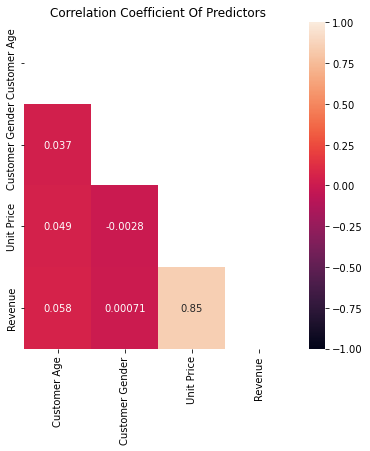

In [30]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(6,6))

# Generate a mask to only show the bottom triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [32]:
# Cross Validation Score of the Test set results
cv_linear = cross_val_score(model, X = X_train, y = y_train, cv=7)

# R2 Score of the Train set results
y_pred_linear_train = model.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# R2 Score of the Test set results
y_pred_linear_test = model.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

print("CV: ", cv_linear)
print()
print('R2_score (train): ', r2_score_linear_train)
print()
print('R2_score (test): ', r2_score_linear_test)

CV:  [0.72133823 0.712744   0.72847279 0.72905923 0.72993619 0.71504565
 0.7167811 ]

R2_score (train):  0.7222414093646248

R2_score (test):  0.7278559233258933


## 3. Conclusion

In this model I analyzed the correlation between the sales of the store and the variables "customer age", "customer gender" and "product price".

***Correlation between sales and price***
<br>

We usually expect that the "price-sales" relationship is the following: when price decreases, the sales increase.
The results of this regression show the opposite trend instead: if the price increases, the sales increase too. This is not something that happens very often, but still it is not impossible: sometimes it depends on the product-niche and on the product itself (e.g. when the brand is very strong, then the customer is willing to pay for the brand).  

***Correlation between sales and customer features***
<br>

I expected to find some correlation between the sales and the customer features, for example "The older the customer, the higher the purchase", or some information about a possible correlation between the customer gender and the sales, but the model didn't show such correlations. 

The cross-validation scores (0,7) and the R squared (0,7) show a good model fit for this data.